In [155]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import csc_array

In [156]:
# our first mesh
coords = np.array([[0,0],[1,0],[1,1],[0,1]])
elems = np.array([[0,2,1],[0,2,3]])

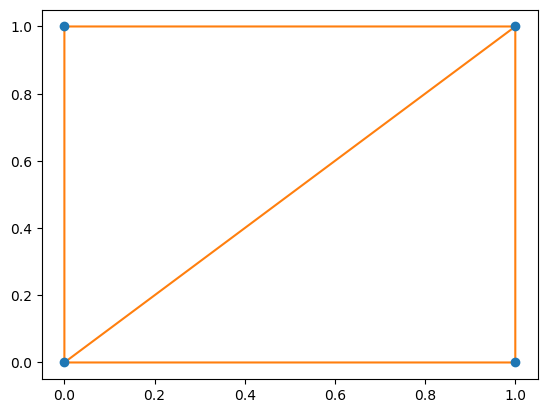

In [157]:
# plot mesh
plt.plot(coords[:,0],coords[:,1],'o')
plt.triplot(coords[:,0],coords[:,1],elems)

In [158]:
# extract the sides
def computeSides(coords,elems):
    sides = np.vstack([elems[:,[0,1]],elems[:,[1,2]],elems[:,[0,2]]])
    sides = np.sort(sides,axis=1)
    sides = np.unique(sides,axis=0)
    return sides

# refine the mesh
def refineMesh(coords, elems):
    sides = computeSides(coords,elems)
    coords4mids = 0.5*coords[sides[:,0],:] + 0.5*coords[sides[:,1],:]
    newcoords = np.vstack([coords,coords4mids])
    
    side4vtx = csc_array((np.arange(coords.shape[0],coords.shape[0]+sides.shape[0]),(sides[:,0],sides[:,1])),shape=(coords.shape[0],coords.shape[0]))
    side4vtx = side4vtx + side4vtx.T
    
    newelems = np.zeros((4*elems.shape[0], 3),dtype=int)
    for k in range(elems.shape[0]):
        p0 = elems[k,0]
        p1 = elems[k,1]
        p2 = elems[k,2]
        p3 = side4vtx[p1,p2]
        p4 = side4vtx[p0,p2]
        p5 = side4vtx[p0,p1]
        newelems[4*(k+1)-4:4*(k+1),:] = np.array([[p0,p4,p5],[p5,p1,p3],[p4,p5,p3],[p4,p3,p2]])
    return newcoords, newelems
    

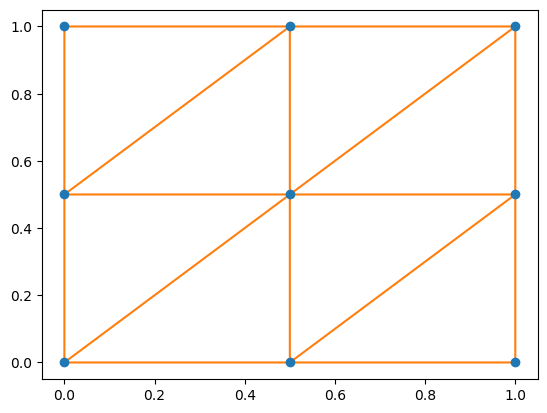

In [159]:
newcoords, newelems = refineMesh(coords,elems)
# plot refined mesh mesh
plt.plot(newcoords[:,0],newcoords[:,1],'o')
plt.triplot(newcoords[:,0],newcoords[:,1],newelems)

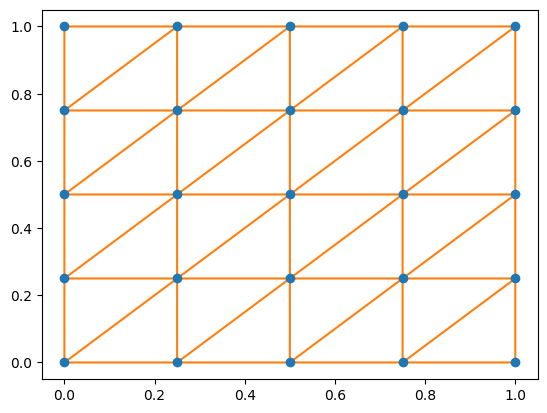

In [160]:
newcoords, newelems = refineMesh(newcoords,newelems)
# plot refined mesh mesh
plt.plot(newcoords[:,0],newcoords[:,1],'o')
plt.triplot(newcoords[:,0],newcoords[:,1],newelems)